In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

IMG_SIZE = 300

pre_trained_model = InceptionV3(input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                                include_top = False, 
                                weights = None)

#  pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed6')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-03-29 07:04:31--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   258MB/s    in 0.3s    

2020-03-29 07:04:32 (258 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 17, 17, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)          
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.1)(x)              
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.summary()

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 149, 149, 32) 96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 149, 149, 32) 0           batch_normalization_658[0][0]    
____________________________________________________________________________________________

In [0]:
TRAINING_DIR = '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train'
#YOUR CODE HERE
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
#YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(IMG_SIZE, IMG_SIZE)) 
#YOUR CODE HERE

VALIDATION_DIR = '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/test'
#YOUR CODE HERE
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
#YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=9,
                                                    class_mode='binary',
                                                    target_size=(IMG_SIZE, IMG_SIZE)) 

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [0]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True


In [0]:
callbacks = myCallback()

history = model.fit(train_generator,
                              epochs=10,
                              steps_per_epoch = 6,
                              verbose=1,
                              validation_data=validation_generator,
                              validation_steps = 3,
                              callbacks=[callbacks]    )

Epoch 1/10
6/6 [==============================] - 3s 571ms/step - loss: 1.2125 - accuracy: 0.8500 - val_loss: 0.6939 - val_accuracy: 0.2593
Epoch 2/10
6/6 [==============================] - 4s 599ms/step - loss: 0.2763 - accuracy: 0.9500 - val_loss: 0.6940 - val_accuracy: 0.5185
Epoch 3/10
6/6 [==============================] - 3s 571ms/step - loss: 0.8807 - accuracy: 0.8500 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 4/10
6/6 [==============================] - 3s 581ms/step - loss: 0.5686 - accuracy: 0.9000 - val_loss: 0.6943 - val_accuracy: 0.4815
Epoch 5/10
6/6 [==============================] - 3s 524ms/step - loss: 0.8883 - accuracy: 0.8667 - val_loss: 0.6939 - val_accuracy: 0.4815
Epoch 6/10
6/6 [==============================] - 4s 610ms/step - loss: 0.6986 - accuracy: 0.8333 - val_loss: 0.6939 - val_accuracy: 0.5185
Epoch 7/10
6/6 [==============================] - 3s 574ms/step - loss: 0.3468 - accuracy: 0.8667 - val_loss: 0.6939 - val_accuracy: 0.4815
Epoch 8/10
6/6 [====

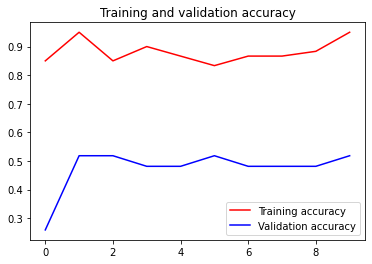

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Text(0.5, 1.0, 'Training and validation loss')

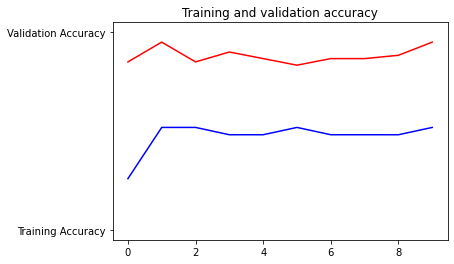

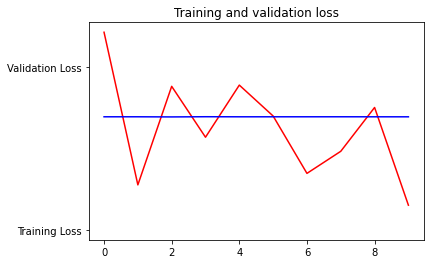

In [0]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a covid")

Saving NORMAL2-IM-1385-0001.jpeg to NORMAL2-IM-1385-0001 (3).jpeg
Saving NORMAL2-IM-1396-0001.jpeg to NORMAL2-IM-1396-0001 (2).jpeg
Saving NORMAL2-IM-1400-0001.jpeg to NORMAL2-IM-1400-0001 (1).jpeg
Saving NORMAL2-IM-1401-0001.jpeg to NORMAL2-IM-1401-0001 (4).jpeg
Saving NORMAL2-IM-1406-0001.jpeg to NORMAL2-IM-1406-0001 (3).jpeg
Saving NORMAL2-IM-1412-0001.jpeg to NORMAL2-IM-1412-0001 (2).jpeg
Saving NORMAL2-IM-1419-0001.jpeg to NORMAL2-IM-1419-0001 (4).jpeg
Saving NORMAL2-IM-1422-0001.jpeg to NORMAL2-IM-1422-0001 (1).jpeg
Saving NORMAL2-IM-1423-0001.jpeg to NORMAL2-IM-1423-0001 (3).jpeg
[0.02778154]
NORMAL2-IM-1385-0001.jpeg is a covid
[0.0395814]
NORMAL2-IM-1396-0001.jpeg is a covid
[0.02329019]
NORMAL2-IM-1400-0001.jpeg is a covid
[0.03285489]
NORMAL2-IM-1401-0001.jpeg is a covid
[0.0175948]
NORMAL2-IM-1406-0001.jpeg is a covid
[0.03522011]
NORMAL2-IM-1412-0001.jpeg is a covid
[0.03343334]
NORMAL2-IM-1419-0001.jpeg is a covid
[0.02612392]
NORMAL2-IM-1422-0001.jpeg is a covid
[0.04889